# Lab 8: Define and Solve an ML Problem of Your Choosing

In [50]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [51]:
# This code helps parallel process
tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [52]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename) # YOUR CODE HERE

df.head()
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. World Happiness Report
2. I will be predicting the perceptions of corruptions. 
3. This is a supervised learning problem. And this is a regression problem
4. For now, all the columns except year and country
5. Suppose, Amazon wants to open a office in "X" country. Before starting their office in "X", Amazon will try to get a idea if they can be profitable and can run without too much government intervention. If corruption is more then they have to spend a huge amount of money to run their office in "X". This is where my model creates value by predicting the perception of corruption from other variables.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [53]:
# YOUR CODE HERE
display(df.dtypes)
display(df.isna().sum())

#df = df.drop(["GINI index (World Bank estimate)", "gini of household income reported in Gallup, by wp5-year"], axis = 1)
#display(df.isna().sum())

df = df.dropna()
display(df.isna().sum())

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

In [54]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.068763,-0.025578,-0.056380,0.002291,0.060499,-0.014417,-0.026897,-0.003007,0.181154,-0.071334,-0.032782,-0.068145,0.140756,0.140182,-0.001171,0.033192,-0.068588
Life Ladder,-0.068763,1.000000,0.686221,0.656326,0.667572,0.615297,0.392069,-0.487501,0.622657,-0.276043,0.086145,0.615624,0.661708,-0.223771,-0.803137,-0.050818,-0.054409,-0.049984
Log GDP per capita,-0.025578,0.686221,1.000000,0.602470,0.843222,0.351596,0.128061,-0.345841,0.239639,-0.133002,-0.081857,0.748087,0.814054,-0.143583,-0.530393,-0.324540,-0.369493,-0.274086
Social support,-0.056380,0.656326,0.602470,1.000000,0.523696,0.460061,0.243978,-0.154715,0.444662,-0.411820,-0.072527,0.517628,0.473250,-0.212397,-0.605309,-0.180994,-0.172469,-0.138529
Healthy life expectancy at birth,0.002291,0.667572,0.843222,0.523696,1.000000,0.331721,0.160466,-0.293303,0.278196,-0.043430,-0.145068,0.708282,0.749580,-0.077591,-0.487271,-0.290695,-0.318414,-0.269332
Freedom to make life choices,0.060499,0.615297,0.351596,0.460061,0.331721,1.000000,0.467647,-0.519656,0.690543,-0.359856,0.407289,0.444436,0.451158,-0.153710,-0.474820,0.070645,0.071953,0.229883
Generosity,-0.014417,0.392069,0.128061,0.243978,0.160466,0.467647,1.000000,-0.370745,0.503200,-0.229309,0.226704,0.174330,0.304775,-0.245429,-0.366584,-0.063632,-0.066203,0.350286
Perceptions of corruption,-0.026897,-0.487501,-0.345841,-0.154715,-0.293303,-0.519656,-0.370745,1.000000,-0.348781,0.285600,-0.493472,-0.396282,-0.547050,0.336549,0.441272,0.144484,0.165458,-0.137381
Positive affect,-0.003007,0.622657,0.239639,0.444662,0.278196,0.690543,0.503200,-0.348781,1.000000,-0.262568,0.234632,0.275781,0.272219,0.015555,-0.406292,0.389730,0.407722,0.288489
Negative affect,0.181154,-0.276043,-0.133002,-0.411820,-0.043430,-0.359856,-0.229309,0.285600,-0.262568,1.000000,-0.297040,-0.149447,-0.177400,0.517881,0.498387,0.201947,0.202230,0.041169


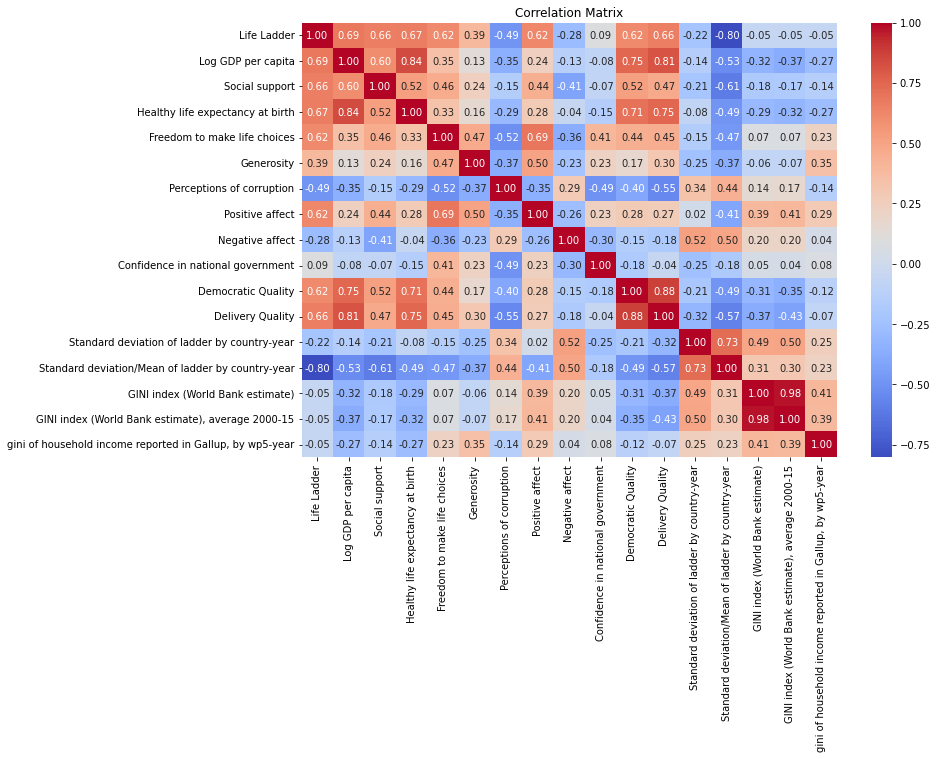

In [55]:
plt.figure(figsize=(12, 8))
numeric_cols = df.drop(["year", "country"], axis = 1).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<li>Yes, I have a new feature list. My new feature list -  Delivery Quality, Freedom to make life choices, Confidence in national government, Life Ladder, Standard deviation/Mean of ladder by country-year, Democratic Quality, Generosity. I found a new way to select features learnt from AI. So, using that I selected the 7 features.
</li>
<li>I have already done a little data preparation by handling the missing values. I will scale the features next and get rid of the outliers</li>
<li>I want to do a linear regression and I will try to do a gradient boosting regressor too if I have enough time</li>
<li>I will use train test split of sklearn to seperate training and testing set. I will evaluate my model with accuracy scores m, mean square error and r squared values. And based on the result, I will tune my hyperparameter or run a gridsearch</li>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [56]:
# Subset the DataFrame to include only selected columns
df_subset = df.drop(["year"], axis = 1)

# Aggregate by country, computing the mean for numeric columns
df_aggregated = df_subset.groupby('country').mean().reset_index()
df = df_aggregated

In [57]:
# The code below I took help from Grok AI to find a easier way for feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Prepare features (drop non-numeric and irrelevant columns)
X = df.drop(["Perceptions of corruption", "country"], axis=1)
y = df["Perceptions of corruption"]

# Scale features (important for some feature selection methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top k features
k = 5 # Choose number of features
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_scaled, y)

# Get selected feature indices and scores
scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
print(scores.sort_values(by="Score", ascending=False))


                                              Feature      Score
10                                   Delivery Quality  41.076087
0                                         Life Ladder  35.524049
4                        Freedom to make life choices  34.827374
12  Standard deviation/Mean of ladder by country-year  27.130489
8                   Confidence in national government  20.805007
9                                  Democratic Quality  20.521737
6                                     Positive affect  17.934825
5                                          Generosity  17.629565
1                                  Log GDP per capita  14.896707
3                    Healthy life expectancy at birth  10.961231
11       Standard deviation of ladder by country-year  10.110034
2                                      Social support   7.527631
7                                     Negative affect   6.785050
14  GINI index (World Bank estimate), average 2000-15   4.732279
13                   GINI

In [58]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = df[['Delivery Quality', 'Freedom to make life choices', 'Confidence in national government', 
                 'Life Ladder', 'Standard deviation/Mean of ladder by country-year', 'Democratic Quality', 'Generosity']]
X_scaled = scaler.fit_transform(X_new)
X = X_new

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [59]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.head()

,Delivery Quality,Freedom to make life choices,Confidence in national government,Life Ladder,Standard deviation/Mean of ladder by country-year,Democratic Quality,Generosity
21,0.385611,0.562496,0.241089,5.764597,0.346844,0.573031,-0.110375
77,0.044685,0.624169,0.184046,5.109590,0.448415,0.298398,-0.138209
35,-0.626846,0.803181,0.364522,6.139692,0.420015,-0.512317,0.054787
71,0.038260,0.805719,0.456508,6.938047,0.331224,0.272478,0.010775
65,1.875242,0.910635,0.576459,7.452826,0.180797,1.313823,0.309779


In [60]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_lr_predict = model_lr.predict(X_test)
print(f"Linear Regression Test MSE: {mean_squared_error(y_test, model_lr_predict):.4f}")
print(f"Linear Regression Test R²: {r2_score(y_test, model_lr_predict):.4f}")
print(f"Linear Regression Test MAE: {mean_absolute_error(y_test, model_lr_predict):.4f}")

Linear Regression Test MSE: 0.0166
Linear Regression Test R²: 0.4919
Linear Regression Test MAE: 0.0914


In [62]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
model_xgb_predict = model_xgb.predict(X_test)
print(f"XGBRegressor Test MSE: {mean_squared_error(y_test, model_xgb_predict):.4f}")
print(f"XGBRegressor Test R²: {r2_score(y_test, model_xgb_predict):.4f}")
print(f"XGBRegressor Test MAE: {mean_absolute_error(y_test, model_xgb_predict):.4f}")

XGBRegressor Test MSE: 0.0084
XGBRegressor Test R²: 0.7411
XGBRegressor Test MAE: 0.0759


<h3>Both the models performed well. But the R squared value of XGBRegressor is better than the linear regression. R squared value greater than 0.7 is considered good.</h3>

In [64]:
mape_lr = np.mean(np.abs((y_test - model_lr_predict) / y_test)) * 100
mape_xgb = np.mean(np.abs((y_test - model_xgb_predict) / y_test)) * 100
print(f"Linear Regression MAPE: {mape_lr:.2f}%")
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

Linear Regression MAPE: 18.43%
XGBoost MAPE: 12.87%


<h3>Mean Absolute Percentage Error for both of the models is good enough
Linear regression doesnot have any hyperparamter since it is a simple model. I will do a grid search and see if I can make the other model better.
(The grid search is not working in any way. It is taking huge amount of time and I cannot see my CPU running at full capacity. I tried parallel processing still it doesn't work)
</h3>

In [ ]:
# The code below doesn't work for some reason
# from sklearn.model_selection import GridSearchCV
# xgb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }
# xgb = XGBRegressor(random_state=42)
# xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
# xgb_grid_search.fit(X_train, y_train)

# # best_xgb = xgb_grid_search.best_estimator_
# # y_pred_xgb = best_xgb.predict(X_test)

# xgb_mse = mean_squared_error(y_test, y_pred_xgb)
# xgb_r2 = r2_score(y_test, y_pred_xgb)
# xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
# xgb_mape = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# print("\nXGBoost Regressor Results:")
# print(f"Best Parameters: {xgb_grid_search.best_params_}")
# print(f"Best Cross-Validation R²: {xgb_grid_search.best_score_:.4f}")
# print(f"Test MSE: {xgb_mse:.4f}")
# print(f"Test R²: {xgb_r2:.4f}")
# print(f"Test MAE: {xgb_mae:.4f}")
# print(f"Test MAPE: {xgb_mape:.2f}%")

<h3>Since the gridsearch function didn't work for me. I will do a manual gridsearch below</h3>

In [71]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5},
    {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5}
]

best_r2 = -float('inf')
best_mae = float('inf')
best_params = None
best_model = None
results = []

print("\nXGBoost Manual Tuning Results:")
for params in param_combinations:
    start_time = time.time()
    model = XGBRegressor(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        random_state=42,
        n_jobs=1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results.append({
        'params': params,
        'mse': mse,
        'r2': r2,
        'mae': mae,
        'mape': mape,
        'time': time.time() - start_time
    })
    
    print(f"\nParameters: {params}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MAPE: {mape:.2f}%")
    print(f"Time taken: {results[-1]['time']:.2f} seconds")
    
    if r2 > best_r2:
        best_r2 = r2
        best_mae = mae
        best_params = params
        best_model = model

# Best model results
print("\nBest XGBoost Model:")
print(f"Parameters: {best_params}")
print(f"Test R²: {best_r2:.4f}")
print(f"Test MAE: {best_mae:.4f}")
print(f"Test MAPE: {results[-1]['mape']:.2f}%")


XGBoost Manual Tuning Results:

Parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}
Test MSE: 0.0108
Test R²: 0.6676
Test MAE: 0.0870
Test MAPE: 14.59%
Time taken: 0.15 seconds

Parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Test MSE: 0.0107
Test R²: 0.6731
Test MAE: 0.0868
Test MAPE: 14.37%
Time taken: 0.30 seconds

Parameters: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
Test MSE: 0.0086
Test R²: 0.7375
Test MAE: 0.0787
Test MAPE: 13.18%
Time taken: 0.32 seconds

Parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5}
Test MSE: 0.0096
Test R²: 0.7048
Test MAE: 0.0803
Test MAPE: 13.66%
Time taken: 0.61 seconds

Best XGBoost Model:
Parameters: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
Test R²: 0.7375
Test MAE: 0.0787
Test MAPE: 13.66%


<h3>Our best parameters are 'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5 for the XGBoost model</h3>

<h3>Comparing linear regression and XGBoost model, XGBoost model performs better than linear regression without any tuning. And after tuning, the XGBoost model performs even better</h3>

<h1>Visualizing the Results</h1>

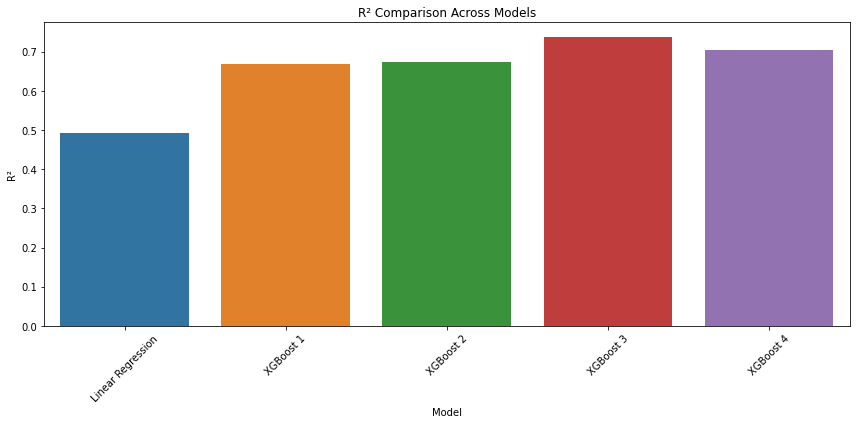

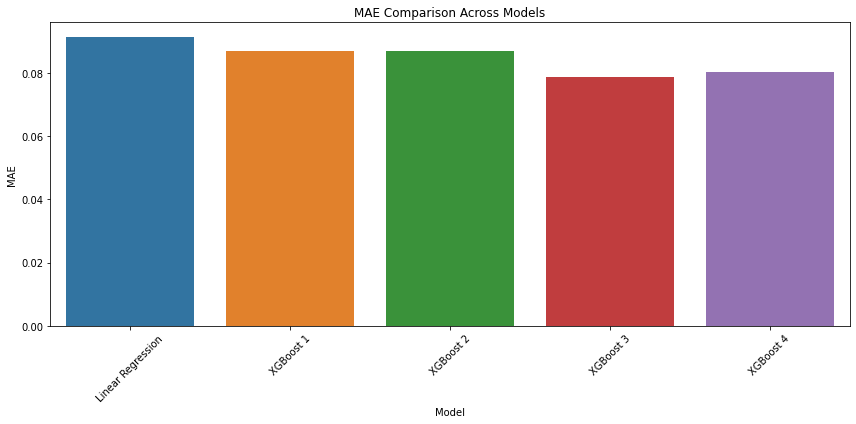

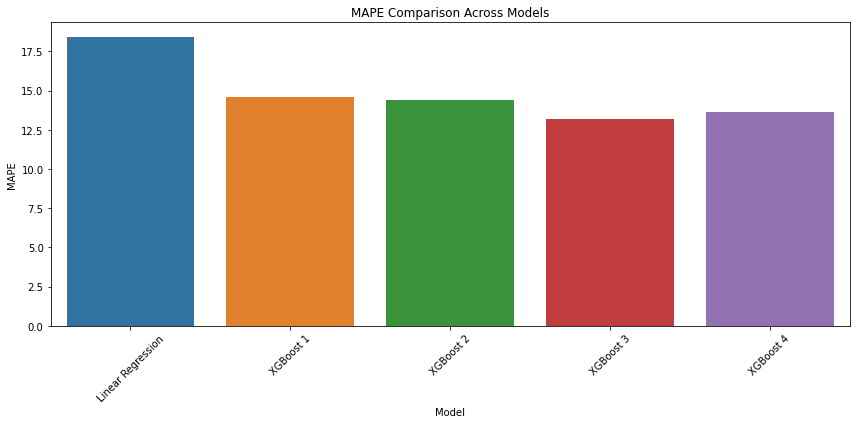

In [76]:
lr_metrics = {
    'Model': 'Linear Regression',
    'R²': r2_score(y_test, model_lr_predict),
    'MAE': mean_absolute_error(y_test, model_lr_predict),
    'MAPE': np.mean(np.abs((y_test - model_lr_predict) / y_test)) * 100
}
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5},
    {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5}
]
results = [
    {'params': param_combinations[0], 'r2': 0.6676, 'mae': 0.0870, 'mape': 14.59},
    {'params': param_combinations[1], 'r2': 0.6731, 'mae': 0.0868, 'mape': 14.37},
    {'params': param_combinations[2], 'r2': 0.7375, 'mae': 0.0787, 'mape': 13.18},
    {'params': param_combinations[3], 'r2': 0.7048, 'mae': 0.0803, 'mape': 13.66}
]

# Train best XGBoost model for visualizations
best_params = {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
best_model = XGBRegressor(**best_params, random_state=42, n_jobs=1)
best_model.fit(X_train, y_train)
y_pred_xgb = best_model.predict(X_test)

# 1. Bar Plot of Model Performance
metrics_df = pd.DataFrame([
    lr_metrics,
    *[{'Model': f"XGBoost {i+1}", 'R²': res['r2'], 'MAE': res['mae'], 'MAPE': res['mape']} 
      for i, res in enumerate(results)]
])



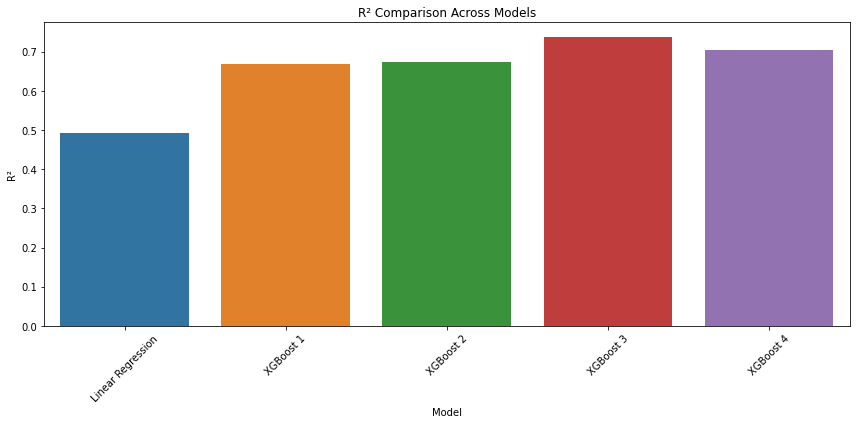

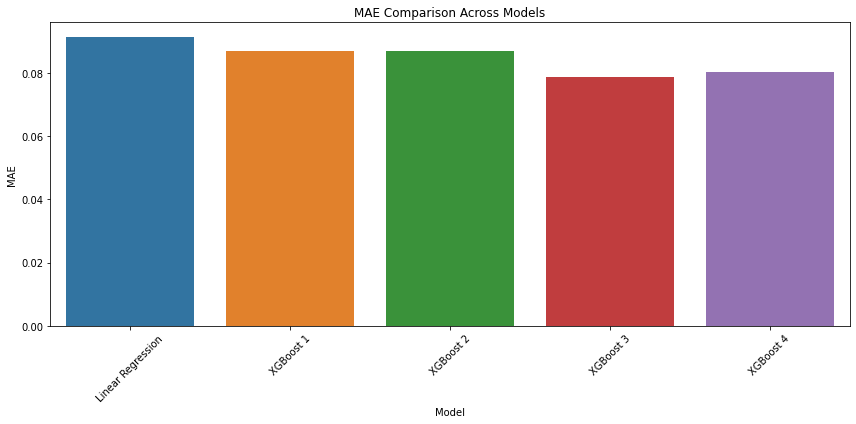

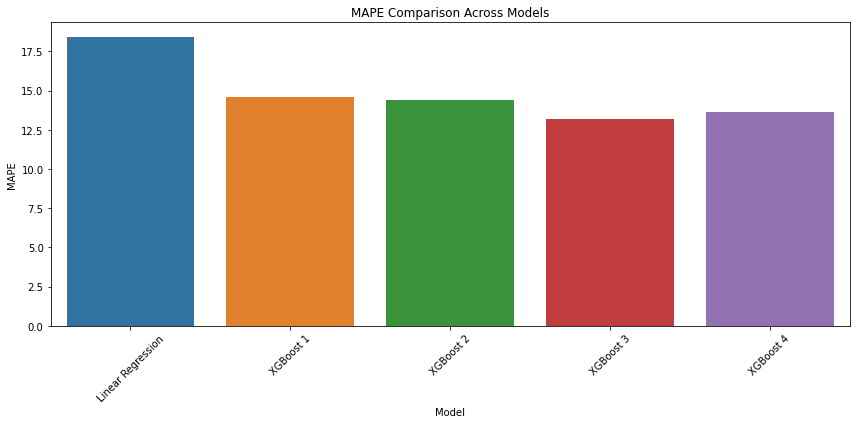

In [77]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', data=metrics_df)
plt.title('R² Comparison Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('MAE Comparison Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAPE', data=metrics_df)
plt.title('MAPE Comparison Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


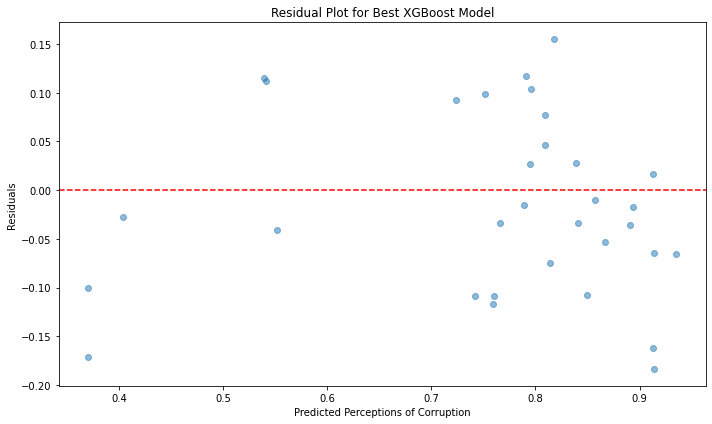

In [78]:
# 2. Residual Plot for Best XGBoost Model
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Perceptions of Corruption')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best XGBoost Model')
plt.tight_layout()
plt.show()



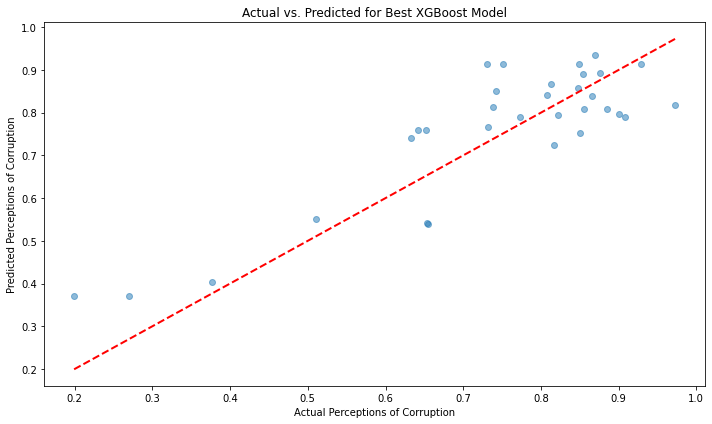

In [79]:

# 3. Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Perceptions of Corruption')
plt.ylabel('Predicted Perceptions of Corruption')
plt.title('Actual vs. Predicted for Best XGBoost Model')
plt.tight_layout()
plt.show()

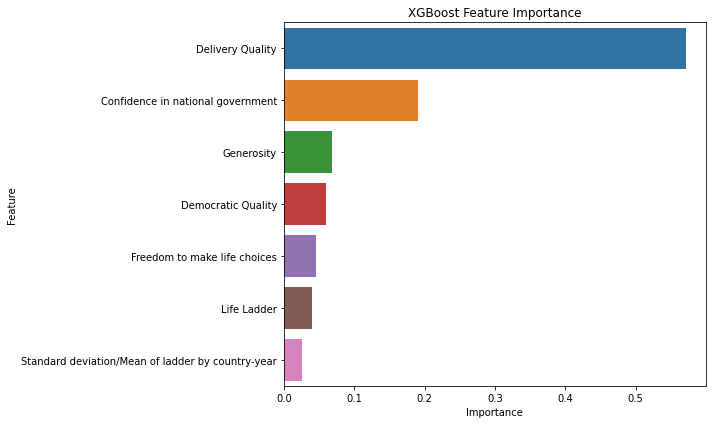

In [80]:

# 4. Feature Importance Bar Plot
importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
